In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

import os
imgdir = 'output_images'
if not os.path.isdir(imgdir):
    os.mkdir(imgdir)

brands = ['Gummies', 'Sugar Buns', 'Sparkle Pop', 'Candys', 'Garlic Bombs', 'Snackmonds', 'Caffeinos', 'moon drops']
spend_types = ['Trade', 'Search', 'Display', 'TV', 'Radio']
num_brands, num_types = len(brands), len(spend_types)

In [2]:
np.random.seed(1)

In [3]:
import tqdm
try:
    tqdm_disp = tqdm.tqdm_notebook if get_ipython(
    ).__class__.__name__ == 'ZMQInteractiveShell' else tqdm.tqdm
except NameError:
    tqdm_disp = tqdm.tqdm

In [4]:
num_promos = 40000
start_date = pd.to_datetime('2016-01-01')
end_date = pd.to_datetime('2018-06-01')
dates = pd.date_range(start_date, end_date)
num_dates = len(dates)

In [5]:
promo = pd.DataFrame(
    {'Brand':np.random.choice(brands, num_promos),
     'Type':np.random.choice(spend_types, num_promos), 
     'Spend':np.random.rand(num_promos) * 500,
     'date' : np.random.choice(dates, num_promos)})
promo = promo.groupby(['Brand', 'Type', 'date'])['Spend'].sum().to_frame()
promo = promo.unstack(fill_value=0).stack()
promo.shape

(35320, 1)

In [6]:
promo.iloc[np.random.choice(promo.shape[0], (promo.shape[0]*99)//100, replace=False)] = 0

In [7]:
initial_promo = promo.copy()

In [8]:
promo.shape, promo.rolling(40).mean().shape

((35320, 1), (35320, 1))

In [9]:
# for _ in range(10):
#     promo.iloc[10:] = promo.iloc[10:] + promo.iloc[:-10]

In [10]:

# promo = pd.concat([promo, initial_promo], axis=1).min(1).to_frame()
promo = promo.rolling(10).max().fillna(0)
promo = promo + np.expand_dims(np.random.rand(promo.shape[0]) * 20, 1)

In [11]:
promo

Spend
Brand      Type    date                 
Caffeinos  Display 2016-01-01  16.135259
                   2016-01-02   3.379709
                   2016-01-03  18.323587
                   2016-01-04  11.090898
                   2016-01-05  13.233954
                   2016-01-06   5.497897
                   2016-01-07   9.765328
                   2016-01-08   4.179285
                   2016-01-09   7.055473
                   2016-01-10   2.894037
                   2016-01-11   3.424799
                   2016-01-12  12.851990
                   2016-01-13   3.374870
                   2016-01-14   4.906858
                   2016-01-15  14.744777
                   2016-01-16   8.775580
                   2016-01-17  13.982107
                   2016-01-18   3.870172
                   2016-01-19   6.490600
                   2016-01-20  18.353236
                   2016-01-21  17.574919
                   2016-01-22   7.925695
                   2016-01-23   6.496538
                   2016-01-24  19.953888
                   2016-01-25  13.542065
                   2016-01-26  11.087325
                   2016-01-27   3.896540
                   2016-01-28  13.320319
                   2016-01-29  18.499334
                   2016-01-30   7.735686
...                                  ...
moon drops Trade   2018-05-03   4.186368
                   2018-05-04   7.422990
                   2018-05-05   6.260364
                   2018-05-06  19.963817
                   2018-05-07  11.545468
                   2018-05-08  17.989797
                   2018-05-09  19.572588
                   2018-05-10  14.830797
                   2018-05-11   5.886499
                   2018-05-12  11.671907
                   2018-05-13   6.884168
                   2018-05-14  12.407853
                   2018-05-15   6.071215
                   2018-05-16  19.395215
                   2018-05-17   4.894022
                   2018-05-18   9.827133
                   2018-05-19   4.488707
                   2018-05-20  13.085179
                   2018-05-21   2.777606
                   2018-05-22   1.921764
                   2018-05-23   4.934038
                   2018-05-24  14.411691
                   2018-05-25   5.522022
                   2018-05-26   6.444841
                   2018-05-27  10.049126
                   2018-05-28   0.993288
                   2018-05-29   6.048639
                   2018-05-30   3.685158
                   2018-05-31   5.222909
                   2018-06-01   4.736664

[35320 rows x 1 columns]

In [12]:
assert(promo.shape[0] == num_brands * num_types * num_dates)

In [13]:
num_brands * num_types * num_dates

35320

In [14]:
true_baselines = {brand: [np.random.randn() * 100 + 1000] for brand in brands}

In [15]:
spend_rois = {t : [np.random.rand()+.8] for t in spend_types}
brand_rois = {t : [np.random.rand()/3] for t in brands}

In [16]:
brand_spend_combos = pd.DataFrame(
    data=np.random.rand(num_brands, num_types) - .5, index=brands, columns = spend_types)

In [17]:
brand_spend_combos  = brand_spend_combos + \
    pd.DataFrame(brand_rois, index=spend_rois).T + pd.DataFrame(spend_rois, index = brands)

In [18]:
brand_spend_combos

,Trade,Search,Display,TV,Radio
Gummies,1.437278,1.893317,1.391724,2.291974,1.060913
Sugar Buns,0.736573,1.250588,0.833542,1.546348,0.830179
Sparkle Pop,1.756932,1.752202,1.092024,2.078857,1.480041
Candys,1.382926,1.800323,1.483670,2.098654,1.244014
Garlic Bombs,1.118210,1.665305,0.768717,1.974458,1.528543
Snackmonds,0.763597,1.735697,1.277892,1.720368,1.235623
Caffeinos,1.556984,1.442897,1.012037,1.504750,1.326360
moon drops,1.161711,1.764109,0.744420,1.965079,0.933735


In [19]:
promo2 = promo.unstack(1)

In [20]:
promo2.columns = promo2.columns.droplevel(0)
promo2 = promo2.reset_index(1)

In [21]:
effect = promo2.copy()
effect[effect.columns[1:]] = effect[effect.columns[1:]] * brand_spend_combos
effect = effect.reset_index().set_index(['Brand', 'date'])
effect = effect.sum(1).to_frame(name='spend').unstack(0)
effect.columns = effect.columns.droplevel(0)

In [22]:
effect.head()

Brand,Caffeinos,Candys,Garlic Bombs,Gummies,Snackmonds,Sparkle Pop,Sugar Buns,moon drops
date,,,,,,,,
2016-01-01,80.648992,80.397104,1475.202535,50.598814,70.440479,63.590091,49.494378,66.219471
2016-01-02,46.975899,94.955024,1478.444736,69.229331,75.523477,67.443032,40.872009,84.770091
2016-01-03,85.275712,73.994805,1511.117952,80.921770,89.080619,47.112774,60.206309,68.475919
2016-01-04,78.249233,123.257274,1493.729258,99.390077,71.882981,44.130266,70.025627,59.129681
2016-01-05,96.823312,74.737035,1505.502842,39.748959,54.221287,82.162322,67.213513,103.320112


In [23]:
salesnoise = pd.DataFrame(data = np.random.rand(num_dates, num_brands) * (-30), columns= brands, index=dates)
salesnoise.head()

,Gummies,Sugar Buns,Sparkle Pop,Candys,Garlic Bombs,Snackmonds,Caffeinos,moon drops
2016-01-01,-26.055594,-5.262947,-11.773256,-19.641696,-1.869418,-10.162017,-21.351608,-27.655961
2016-01-02,-17.105822,-25.585394,-17.514993,-12.855298,-0.378581,-29.094261,-27.711193,-3.466505
2016-01-03,-13.374861,-7.592778,-25.848567,-15.902208,-3.024488,-1.982246,-15.249565,-2.516850
2016-01-04,-23.485189,-20.798727,-0.436049,-9.702418,-20.794636,-2.065812,-19.004896,-9.525924
2016-01-05,-28.521287,-24.505317,-10.141417,-22.830015,-3.659542,-5.716049,-14.571160,-6.225739


In [24]:
seasonal_effects = pd.DataFrame(
    {brand: {'cos':np.random.randn() * 300, 'sin':np.random.randn()*300} for brand in brands})

In [25]:
seasonal_effects

,Gummies,Sugar Buns,Sparkle Pop,Candys,Garlic Bombs,Snackmonds,Caffeinos,moon drops
cos,-169.335809,-94.191682,-475.832887,-391.631527,-214.565008,112.885672,-260.849535,184.764160
sin,10.649195,-218.437284,367.680486,118.404713,596.901540,554.543320,-194.726173,-171.985174


In [26]:
seasonal_effects.T

,cos,sin
Gummies,-169.335809,10.649195
Sugar Buns,-94.191682,-218.437284
Sparkle Pop,-475.832887,367.680486
Candys,-391.631527,118.404713
Garlic Bombs,-214.565008,596.901540
Snackmonds,112.885672,554.543320
Caffeinos,-260.849535,-194.726173
moon drops,184.764160,-171.985174


In [27]:
brand_spend_combos

,Trade,Search,Display,TV,Radio
Gummies,1.437278,1.893317,1.391724,2.291974,1.060913
Sugar Buns,0.736573,1.250588,0.833542,1.546348,0.830179
Sparkle Pop,1.756932,1.752202,1.092024,2.078857,1.480041
Candys,1.382926,1.800323,1.483670,2.098654,1.244014
Garlic Bombs,1.118210,1.665305,0.768717,1.974458,1.528543
Snackmonds,0.763597,1.735697,1.277892,1.720368,1.235623
Caffeinos,1.556984,1.442897,1.012037,1.504750,1.326360
moon drops,1.161711,1.764109,0.744420,1.965079,0.933735


In [28]:
brand_spend_combos_with_seasonality = brand_spend_combos.join(seasonal_effects.T)

In [29]:
seasonal = salesnoise.index.dayofyear

seasonal_sine, seasonal_cos = np.sin(seasonal*2*np.pi/365), np.cos(seasonal*2*np.pi/365)

In [30]:
seasonal_effects = seasonal_effects[effect.columns]

In [31]:
seasonal_effects.loc[['cos'],:].values * np.expand_dims(seasonal_cos.values, 1)

array([[-260.81088726, -391.57350213, -214.53321752, ..., -475.76238726,
         -94.17772692,  184.73678525],
       [-260.69495569, -391.39944601, -214.43785658, ..., -475.55090882,
         -94.13586451,  184.65466895],
       [-260.50177458, -391.10940979, -214.27895307, ..., -475.19851439,
         -94.06610762,  184.51783548],
       ...,
       [ 221.08065557,  331.92374546,  181.8526246 , ...,  403.28784423,
          79.83130546, -156.59518673],
       [ 223.43092893,  335.4523741 ,  183.78587098, ...,  407.57513328,
          80.6799794 , -158.2599253 ],
       [ 225.71499488,  338.88160097,  185.66465765, ...,  411.74164902,
          81.50474611, -159.87776804]])

In [32]:
seasonal_effects.loc[['cos'],:]

,Caffeinos,Candys,Garlic Bombs,Gummies,Snackmonds,Sparkle Pop,Sugar Buns,moon drops
cos,-260.849535,-391.631527,-214.565008,-169.335809,112.885672,-475.832887,-94.191682,184.76416


In [33]:
seasonal_impact = seasonal_effects.loc[['cos'],:].values * np.expand_dims(seasonal_cos.values, 1) + \
    seasonal_effects.loc[['sin'],:].values * np.expand_dims(seasonal_sine.values, 1)

In [34]:
total_sales = effect + salesnoise + pd.DataFrame(true_baselines).iloc[0,:] + seasonal_impact

In [35]:
# total_sales = pd.DataFrame(
#     data=total_sales.values + np.expand_dims(sine.values, 1) + np.expand_dims(cos.values, 1),
#     index=total_sales.index, columns=total_sales.columns)

In [36]:
total_sales.head()

,Caffeinos,Candys,Garlic Bombs,Gummies,Snackmonds,Sparkle Pop,Sugar Buns,moon drops
date,,,,,,,,
2016-01-01,777.161472,573.145233,2267.235086,909.167456,1191.811622,346.439065,1085.344364,1164.263961
2016-01-02,733.893828,596.701145,2282.335119,937.006259,1187.454930,351.088887,1052.682485,1203.962356
2016-01-03,781.499537,575.020384,2322.786878,952.738211,1237.577553,329.100839,1086.322461,1185.523195
2016-01-04,767.642168,632.923092,2298.106850,961.454692,1229.707925,358.341820,1079.280106,1166.021192
2016-01-05,787.655506,573.829067,2337.545603,897.185819,1217.762894,393.612649,1069.137976,1210.314005


In [37]:
total_sales = total_sales.stack().to_frame(name='sales')

In [38]:
total_sales.head()

sales
date                                
2016-01-01 Caffeinos      777.161472
           Candys         573.145233
           Garlic Bombs  2267.235086
           Gummies        909.167456
           Snackmonds    1191.811622

In [39]:
promo_viewed = promo.unstack(1)
promo_viewed.columns = promo_viewed.columns.droplevel(0)
promo_viewed = promo_viewed.reset_index().sort_values('date').set_index(['date', 'Brand'])
promo_viewed.head(10)

Type                       Display      Radio      Search          TV  \
date       Brand                                                        
2016-01-01 Caffeinos     16.135259  14.690913    2.831179   10.361171   
           Snackmonds    14.160272  11.713946   13.184446    5.271207   
           Garlic Bombs  15.082936  10.859023  439.239679  358.579183   
           Sparkle Pop   11.788951  12.501283   11.123498    0.982495   
           Sugar Buns    15.927496  10.975427    8.207050    8.752944   
           Candys        17.723680  16.848329    7.227749    6.421023   
           moon drops    12.241247  11.396089    8.302899    6.923919   
           Gummies        0.981848  12.171804    2.409140    8.741358   
2016-01-02 moon drops     5.709591  10.711031    9.527136   17.292716   
           Snackmonds    18.230621  17.158762    6.862294    9.937763   

Type                         Trade  
date       Brand                    
2016-01-01 Caffeinos     16.158169  
           Snackmonds     7.750863  
           Garlic Bombs   6.744747  
           Sparkle Pop    6.079220  
           Sugar Buns     4.490846  
           Candys         4.811291  
           moon drops    15.677442  
           Gummies        8.156312  
2016-01-02 moon drops    16.983607  
           Snackmonds     2.642065

In [40]:
total_sales = total_sales - total_sales.min()
#total_sales = total_sales * 1000 / total_sales.max()

In [41]:
sales_viewed = total_sales.clip(0, np.inf)

In [42]:
data_viewed = promo_viewed.join(sales_viewed, on=['date', 'Brand'])

In [43]:
data_viewed.round(2).head(10)

Display  Radio  Search      TV  Trade    sales
date       Brand                                                       
2016-01-01 Caffeinos       16.14  14.69    2.83   10.36  16.16   598.21
           Snackmonds      14.16  11.71   13.18    5.27   7.75  1012.86
           Garlic Bombs    15.08  10.86  439.24  358.58   6.74  2088.28
           Sparkle Pop     11.79  12.50   11.12    0.98   6.08   167.49
           Sugar Buns      15.93  10.98    8.21    8.75   4.49   906.39
           Candys          17.72  16.85    7.23    6.42   4.81   394.19
           moon drops      12.24  11.40    8.30    6.92  15.68   985.31
           Gummies          0.98  12.17    2.41    8.74   8.16   730.22
2016-01-02 moon drops       5.71  10.71    9.53   17.29  16.98  1025.01
           Snackmonds      18.23  17.16    6.86    9.94   2.64  1008.50

In [44]:
sales_viewed.head(10)

sales
date                                
2016-01-01 Caffeinos      598.211162
           Candys         394.194923
           Garlic Bombs  2088.284776
           Gummies        730.217146
           Snackmonds    1012.861312
           Sparkle Pop    167.488755
           Sugar Buns     906.394054
           moon drops     985.313651
2016-01-02 Caffeinos      554.943518
           Candys         417.750835

In [45]:
spend = data_viewed.drop('sales', 1)
Yraw = data_viewed[['sales']]
spend.head(10)

Display      Radio      Search          TV  \
date       Brand                                                        
2016-01-01 Caffeinos     16.135259  14.690913    2.831179   10.361171   
           Snackmonds    14.160272  11.713946   13.184446    5.271207   
           Garlic Bombs  15.082936  10.859023  439.239679  358.579183   
           Sparkle Pop   11.788951  12.501283   11.123498    0.982495   
           Sugar Buns    15.927496  10.975427    8.207050    8.752944   
           Candys        17.723680  16.848329    7.227749    6.421023   
           moon drops    12.241247  11.396089    8.302899    6.923919   
           Gummies        0.981848  12.171804    2.409140    8.741358   
2016-01-02 moon drops     5.709591  10.711031    9.527136   17.292716   
           Snackmonds    18.230621  17.158762    6.862294    9.937763   

                             Trade  
date       Brand                    
2016-01-01 Caffeinos     16.158169  
           Snackmonds     7.750863  
           Garlic Bombs   6.744747  
           Sparkle Pop    6.079220  
           Sugar Buns     4.490846  
           Candys         4.811291  
           moon drops    15.677442  
           Gummies        8.156312  
2016-01-02 moon drops    16.983607  
           Snackmonds     2.642065

In [46]:
seasonal_X = spend.reset_index()['date'].dt.dayofyear

sine_X, cos_X = np.sin(seasonal_X*2*np.pi/365), np.cos(seasonal_X*2*np.pi/365)
#sine_X = sine_X.to_frame('sine')
#cos_X = cos_X.to_frame('cos')

In [47]:
dummies = pd.get_dummies(spend.reset_index()['Brand'])
dummies = dummies.set_index(spend.index)

In [48]:

spend['cos'] = cos_X.values
spend['sin'] = sine_X.values

In [49]:
spend.reset_index().groupby('date')[['cos', 'sin']].max().head(10)

,cos,sin
date,,
2016-01-01,0.999852,0.017213
2016-01-02,0.999407,0.034422
2016-01-03,0.998667,0.051620
2016-01-04,0.997630,0.068802
2016-01-05,0.996298,0.085965
2016-01-06,0.994671,0.103102
2016-01-07,0.992749,0.120208
2016-01-08,0.990532,0.137279
2016-01-09,0.988023,0.154309


In [50]:
spend.reset_index().set_index('date')['Brand'].to_frame().head()

,Brand
date,
2016-01-01,Caffeinos
2016-01-01,Snackmonds
2016-01-01,Garlic Bombs
2016-01-01,Sparkle Pop
2016-01-01,Sugar Buns


In [51]:
def color_background(val):
    color = '' if val < 1 else 'lightgreen'
    return 'background-color: ' + color
def color_number(val):
    color = 'red' if val < 1 else ''
    return 'color: %s' % color

In [52]:
dummies.head().style.applymap(color_background).applymap(color_number)

In [53]:
dummies.head()

Caffeinos  Candys  Garlic Bombs  Gummies  Snackmonds  \
date       Brand                                                                
2016-01-01 Caffeinos             1       0             0        0           0   
           Snackmonds            0       0             0        0           1   
           Garlic Bombs          0       0             1        0           0   
           Sparkle Pop           0       0             0        0           0   
           Sugar Buns            0       0             0        0           0   

                         Sparkle Pop  Sugar Buns  moon drops  
date       Brand                                              
2016-01-01 Caffeinos               0           0           0  
           Snackmonds              0           0           0  
           Garlic Bombs            0           0           0  
           Sparkle Pop             1           0           0  
           Sugar Buns              0           1           0

In [54]:
dummy_spends = {}
for dummy in dummies.columns:
    brand_spend = pd.DataFrame(
        dummies[dummy].to_frame().values * spend.values, 
        index=spend.index, columns=['type:' + c + '_brand:' + dummy for c in spend.columns])
    dummy_spends[dummy] = brand_spend

In [55]:
Xraw = pd.concat((spend, dummies, *list(dummy_spends.values())), 1)

In [56]:
Xraw.head(10).tail(5).round()

Display  Radio  Search    TV  Trade  cos  sin  \
date       Brand                                                       
2016-01-01 Candys         18.0   17.0     7.0   6.0    5.0  1.0  0.0   
           moon drops     12.0   11.0     8.0   7.0   16.0  1.0  0.0   
           Gummies         1.0   12.0     2.0   9.0    8.0  1.0  0.0   
2016-01-02 moon drops      6.0   11.0    10.0  17.0   17.0  1.0  0.0   
           Snackmonds     18.0   17.0     7.0  10.0    3.0  1.0  0.0   

                       Caffeinos  Candys  Garlic Bombs  \
date       Brand                                         
2016-01-01 Candys              0       1             0   
           moon drops          0       0             0   
           Gummies             0       0             0   
2016-01-02 moon drops          0       0             0   
           Snackmonds          0       0             0   

                                 ...              type:Trade_brand:Sugar Buns  \
date       Brand                 ...                                            
2016-01-01 Candys                ...                                      0.0   
           moon drops            ...                                      0.0   
           Gummies               ...                                      0.0   
2016-01-02 moon drops            ...                                      0.0   
           Snackmonds            ...                                      0.0   

                       type:cos_brand:Sugar Buns  type:sin_brand:Sugar Buns  \
date       Brand                                                              
2016-01-01 Candys                            0.0                        0.0   
           moon drops                        0.0                        0.0   
           Gummies                           0.0                        0.0   
2016-01-02 moon drops                        0.0                        0.0   
           Snackmonds                        0.0                        0.0   

                       type:Display_brand:moon drops  \
date       Brand                                       
2016-01-01 Candys                                0.0   
           moon drops                           12.0   
           Gummies                               0.0   
2016-01-02 moon drops                            6.0   
           Snackmonds                            0.0   

                       type:Radio_brand:moon drops  \
date       Brand                                     
2016-01-01 Candys                              0.0   
           moon drops                         11.0   
           Gummies                             0.0   
2016-01-02 moon drops                         11.0   
           Snackmonds                          0.0   

                       type:Search_brand:moon drops  type:TV_brand:moon drops  \
date       Brand                                                                
2016-01-01 Candys                               0.0                       0.0   
           moon drops                           8.0                       7.0   
           Gummies                              0.0                       0.0   
2016-01-02 moon drops                          10.0                      17.0   
           Snackmonds                           0.0                       0.0   

                       type:Trade_brand:moon drops  type:cos_brand:moon drops  \
date       Brand                                                                
2016-01-01 Candys                              0.0                        0.0   
           moon drops                         16.0                        1.0   
           Gummies                             0.0                        0.0   
2016-01-02 moon drops                         17.0                        1.0   
           Snackmonds                          0.0                        0.0   

                       type:sin_brand:moon drops  
date       Brand              

In [57]:
xmeans, xstds = Xraw.mean(), Xraw.std()
ymeans, ystds = Yraw.mean(), Yraw.std()

In [58]:
xstds[spend.columns] = xstds[spend.columns] / 10
for col in xstds.index:
    if 'sin_' in col or 'cos_' in col:
        xstds[col] = xstds[col] / 10


In [59]:
xstds[brands] = xstds[brands] / 100

In [60]:
X = (Xraw - xmeans) / xstds
Y = (Yraw - ymeans)/ystds

In [61]:
X.round(2).head()

Display  Radio  Search     TV  Trade    cos  sin  \
date       Brand                                                            
2016-01-01 Caffeinos       -1.88  -1.76   -3.05  -1.99  -1.39  13.88 -1.5   
           Snackmonds      -2.04  -2.01   -2.24  -2.34  -2.06  13.88 -1.5   
           Garlic Bombs    -1.97  -2.08   30.85  21.96  -2.15  13.88 -1.5   
           Sparkle Pop     -2.23  -1.94   -2.40  -2.64  -2.20  13.88 -1.5   
           Sugar Buns      -1.90  -2.07   -2.63  -2.10  -2.33  13.88 -1.5   

                         Caffeinos  Candys  Garlic Bombs  \
date       Brand                                           
2016-01-01 Caffeinos        264.56  -37.79        -37.79   
           Snackmonds       -37.79  -37.79        -37.79   
           Garlic Bombs     -37.79  -37.79        264.56   
           Sparkle Pop      -37.79  -37.79        -37.79   
           Sugar Buns       -37.79  -37.79        -37.79   

                                   ...              \
date       Brand                   ...               
2016-01-01 Caffeinos               ...               
           Snackmonds              ...               
           Garlic Bombs            ...               
           Sparkle Pop             ...               
           Sugar Buns              ...               

                         type:Trade_brand:Sugar Buns  \
date       Brand                                       
2016-01-01 Caffeinos                           -0.07   
           Snackmonds                          -0.07   
           Garlic Bombs                        -0.07   
           Sparkle Pop                         -0.07   
           Sugar Buns                           0.02   

                         type:cos_brand:Sugar Buns  type:sin_brand:Sugar Buns  \
date       Brand                                                                
2016-01-01 Caffeinos                         -0.17                      -0.61   
           Snackmonds                        -0.17                      -0.61   
           Garlic Bombs                      -0.17                      -0.61   
           Sparkle Pop                       -0.17                      -0.61   
           Sugar Buns                        40.39                       0.07   

                         type:Display_brand:moon drops  \
date       Brand                                         
2016-01-01 Caffeinos                             -0.12   
           Snackmonds                            -0.12   
           Garlic Bombs                          -0.12   
           Sparkle Pop                           -0.12   
           Sugar Buns                            -0.12   

                         type:Radio_brand:moon drops  \
date       Brand                                       
2016-01-01 Caffeinos                           -0.11   
           Snackmonds                          -0.11   
           Garlic Bombs                        -0.11   
           Sparkle Pop                         -0.11   
           Sugar Buns                          -0.11   

                         type:Search_brand:moon drops  \
date       Brand                                        
2016-01-01 Caffeinos                            -0.11   
           Snackmonds                           -0.11   
           Garlic Bombs                         -0.11   
           Sparkle Pop                          -0.11   
           Sugar Buns                           -0.11   

                         type:TV_brand:moon drops  \
date       Brand                                    
2016-01-01 Caffeinos                        -0.07   
           Snackmonds                       -0.07   
           Garlic Bombs                     -0.07   
           Sparkle Pop                      -0.07   
           Sugar Buns                       -0.07   

                         type:Trade_brand:moon drops  \
date       Brand                                       
2016-01-01 Caffeinos                    

In [62]:
clf = Ridge(1e-5).fit(X, Y)

In [63]:
import tensorflow as tf
lr = tf.placeholder(tf.float32, ())
x_in = tf.placeholder(tf.float32, (None, X.shape[1]))
y_in = tf.placeholder(tf.float32, (None))
w = tf.Variable(np.random.randn(X.shape[1]), dtype=tf.float32)
b = tf.Variable(0, dtype=tf.float32)
yhat = tf.reduce_sum(x_in * tf.expand_dims(w, 0)) + b
loss = tf.reduce_mean(tf.square(y_in-yhat)) + 1e-15 * (tf.reduce_sum(tf.square(w)))

In [64]:
# optim = tf.train.AdamOptimizer(lr).minimize(loss)

# feed_dict = {
#     x_in:X, y_in:Y
# }

# s = tf.Session()
# s.run(tf.global_variables_initializer())
# for i in range(1000):
#     feed_dict[lr] = 1e0/np.sqrt(i+1)
#     l, _ = s.run([loss, optim], feed_dict)
#     if i % 100 == 0:
#         print(l)

In [65]:
# optim = tf.contrib.opt.ScipyOptimizerInterface(
#         loss, tol=0
#     )
# feed_dict = {
#     x_in:X, y_in:Y
# }

# s = tf.Session()
# s.run(tf.global_variables_initializer())

# with tqdm_disp() as tq:
#     y_hat_trace = []

#     def loss_callback(y_hat, loss):
#         y_hat_trace.append(y_hat)
#         tq.update()
#         tq.set_postfix_str('loss = %.6f' % (loss))

#     optim.minimize(
#         s,
#         feed_dict=feed_dict,
#         fetches=[yhat, loss],
#         loss_callback=loss_callback,
#     )
#     y_hat = y_hat_trace[-1]

In [66]:
#s.run(loss, feed_dict)

In [67]:
#coef_tf = s.run(w)

In [68]:
clf.coef_

array([[ 2.08812995e-02,  2.75001956e-02,  3.92576602e-02,
         5.27857454e-02,  2.65002723e-02, -1.06082322e-02,
         8.85891719e-03,  4.98359429e-05, -4.41132329e-04,
         1.48783582e-04,  4.89873655e-04,  2.15160045e-04,
        -1.29242561e-03,  1.01626126e-03, -1.86054751e-04,
         9.22299519e-03,  7.00764000e-03, -1.24474099e-02,
        -3.43707424e-02,  2.27745423e-02, -8.20835952e-03,
        -1.23660859e-02,  3.04144355e-02, -3.11283785e-04,
         1.56111770e-02,  1.70957985e-02,  1.67065500e-02,
        -1.42191857e-02,  2.39807659e-03, -1.53045043e-02,
         2.60987168e-02,  2.68308609e-03,  2.84990687e-03,
        -3.64654430e-03, -6.10248644e-03,  2.49447975e-02,
         2.55320566e-02, -1.95699726e-02,  1.89797339e-02,
         3.53261849e-02,  2.75653875e-02, -4.00604787e-03,
        -2.66299860e-03,  7.20440311e-03, -9.15147059e-04,
         1.09907392e-02, -2.30123348e-02, -2.42632058e-02,
         8.93561761e-03,  2.29440228e-02,  1.64166305e-0

In [69]:
coef = clf.coef_ / xstds.values * ystds.values
#coef = (np.expand_dims(coef_tf, 0) / xstds.values) * ystds.values

In [70]:
display = pd.DataFrame(coef, columns=X.columns)

In [71]:
aggregated = spend.columns
bias = dummies.columns
deltas = np.array([col for col in X.columns if col not in aggregated and col not in bias])

In [72]:
results = pd.DataFrame(
    data=np.zeros((num_brands+1, spend.columns.shape[0]+1)), 
    index=['aggregated'] + brands, columns = ['bias'] + list(spend.columns))

In [73]:
results

,bias,Display,Radio,Search,TV,Trade,cos,sin
aggregated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gummies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sugar Buns,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sparkle Pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Candys,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Garlic Bombs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Snackmonds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Caffeinos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
moon drops,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
results.loc[['aggregated'], aggregated]


,Display,Radio,Search,TV,Trade,cos,sin
aggregated,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
display[aggregated]

,Display,Radio,Search,TV,Trade,cos,sin
0,0.882159,1.245067,1.637833,1.950865,1.144915,-81.81803,67.38499


In [76]:
display

,Display,Radio,Search,TV,Trade,cos,sin,Caffeinos,Candys,Garlic Bombs,...,type:Trade_brand:Sugar Buns,type:cos_brand:Sugar Buns,type:sin_brand:Sugar Buns,type:Display_brand:moon drops,type:Radio_brand:moon drops,type:Search_brand:moon drops,type:TV_brand:moon drops,type:Trade_brand:moon drops,type:cos_brand:moon drops,type:sin_brand:moon drops
0,0.882159,1.245067,1.637833,1.950865,1.144915,-81.81803,67.38499,8.094496,-71.64997,24.165853,...,-0.407965,-11.699032,-284.826051,-0.138533,-0.305775,0.125053,0.01787,0.0161,266.965456,-239.002332


In [77]:
display['type:Display_brand:Gummies']

0    0.515316
Name: type:Display_brand:Gummies, dtype: float64

In [78]:
results.loc[['aggregated'], aggregated] = display[aggregated].values
for brand in brands:
    results.loc[brand, 'bias'] = display[brand].values
    results.loc[brand, aggregated] = display.loc[:,[b for b in deltas if brand in b]].values + display[aggregated].values

In [79]:
results

,bias,Display,Radio,Search,TV,Trade,cos,sin
aggregated,0.000000,0.882159,1.245067,1.637833,1.950865,1.144915,-81.818030,67.384990
Gummies,79.566675,1.397476,1.063494,1.886371,2.289287,1.439848,-169.123136,10.838183
Sugar Buns,165.064050,0.835034,0.826930,1.249509,1.548152,0.736951,-93.517062,-217.441062
Sparkle Pop,-209.919450,1.093229,1.477529,1.751654,2.079932,1.762687,-476.051820,367.615423
Candys,-71.649970,1.478258,1.240601,1.800300,2.098521,1.384822,-391.701379,118.306374
Garlic Bombs,24.165853,0.769805,1.528430,1.665846,1.974613,1.116842,-214.811506,597.069327
Snackmonds,34.946908,1.302442,1.232247,1.735581,1.719618,0.769132,112.918797,554.584355
Caffeinos,8.094496,1.009292,1.324397,1.445982,1.502966,1.560339,-260.705484,-195.199704
moon drops,-30.219543,0.743626,0.939291,1.762886,1.968734,1.161015,185.147426,-171.617342


In [80]:
import calendar

In [81]:
def add_month(df):
    df = df.copy()

    df['phase'] = np.angle((
            df['sin'] * 1j + df['cos']).astype(complex))
    df['peak_month'] = ((
            (df['phase'] * 12 / 2 / np.pi)) % 12).round().astype(int)
    df.loc[df['peak_month'] == 0, 'peak_month'] = 12
    df['peak_month'] = df['peak_month'].apply(
        lambda x: calendar.month_abbr[x])
    df['seasonal_impact'] = np.sqrt(
        (np.square(df['sin']) + np.square(
            df['cos'])).astype('float'))
    df['seasonal_impact'] = (df[
        'seasonal_impact'] - df['seasonal_impact'].min()) / df['seasonal_impact'].std() + 0.1
    return df

In [82]:
groundtruth = add_month(brand_spend_combos_with_seasonality)
results2 = add_month(results)

In [83]:
groundtruth[list(aggregated) + ['peak_month', 'seasonal_impact']].round(2)

,Display,Radio,Search,TV,Trade,cos,sin,peak_month,seasonal_impact
Gummies,1.39,1.06,1.89,2.29,1.44,-169.34,10.65,Jun,0.10
Sugar Buns,0.83,0.83,1.25,1.55,0.74,-94.19,-218.44,Aug,0.48
Sparkle Pop,1.09,1.48,1.75,2.08,1.76,-475.83,367.68,May,2.48
Candys,1.48,1.24,1.80,2.10,1.38,-391.63,118.40,May,1.42
Garlic Bombs,0.77,1.53,1.67,1.97,1.12,-214.57,596.90,Apr,2.66
Snackmonds,1.28,1.24,1.74,1.72,0.76,112.89,554.54,Mar,2.29
Caffeinos,1.01,1.33,1.44,1.50,1.56,-260.85,-194.73,Jul,0.96
moon drops,0.74,0.93,1.76,1.97,1.16,184.76,-171.99,Nov,0.56


In [84]:
display[[col for col in display.columns if 'sin' in col and 'Cand' in col]]

,type:sin_brand:Candys
0,50.921384


In [85]:
results2[list(aggregated) + ['peak_month', 'seasonal_impact']].round(2)

,Display,Radio,Search,TV,Trade,cos,sin,peak_month,seasonal_impact
aggregated,0.88,1.25,1.64,1.95,1.14,-81.82,67.38,May,0.10
Gummies,1.40,1.06,1.89,2.29,1.44,-169.12,10.84,Jun,0.42
Sugar Buns,0.84,0.83,1.25,1.55,0.74,-93.52,-217.44,Aug,0.77
Sparkle Pop,1.09,1.48,1.75,2.08,1.76,-476.05,367.62,May,2.63
Candys,1.48,1.24,1.80,2.10,1.38,-391.70,118.31,May,1.65
Garlic Bombs,0.77,1.53,1.67,1.97,1.12,-214.81,597.07,Apr,2.80
Snackmonds,1.30,1.23,1.74,1.72,0.77,112.92,554.58,Mar,2.45
Caffeinos,1.01,1.32,1.45,1.50,1.56,-260.71,-195.20,Jul,1.22
moon drops,0.74,0.94,1.76,1.97,1.16,185.15,-171.62,Nov,0.85


In [86]:
display_aggregated = display.rename({col: 'aggregated:'+col for col in spend.columns}, axis=1)

In [87]:
display_aggregated

,aggregated:Display,aggregated:Radio,aggregated:Search,aggregated:TV,aggregated:Trade,aggregated:cos,aggregated:sin,Caffeinos,Candys,Garlic Bombs,...,type:Trade_brand:Sugar Buns,type:cos_brand:Sugar Buns,type:sin_brand:Sugar Buns,type:Display_brand:moon drops,type:Radio_brand:moon drops,type:Search_brand:moon drops,type:TV_brand:moon drops,type:Trade_brand:moon drops,type:cos_brand:moon drops,type:sin_brand:moon drops
0,0.882159,1.245067,1.637833,1.950865,1.144915,-81.81803,67.38499,8.094496,-71.64997,24.165853,...,-0.407965,-11.699032,-284.826051,-0.138533,-0.305775,0.125053,0.01787,0.0161,266.965456,-239.002332


In [88]:
X.columns.shape

(71,)

In [89]:
data_viewed.head()

Display      Radio      Search          TV  \
date       Brand                                                        
2016-01-01 Caffeinos     16.135259  14.690913    2.831179   10.361171   
           Snackmonds    14.160272  11.713946   13.184446    5.271207   
           Garlic Bombs  15.082936  10.859023  439.239679  358.579183   
           Sparkle Pop   11.788951  12.501283   11.123498    0.982495   
           Sugar Buns    15.927496  10.975427    8.207050    8.752944   

                             Trade        sales  
date       Brand                                 
2016-01-01 Caffeinos     16.158169   598.211162  
           Snackmonds     7.750863  1012.861312  
           Garlic Bombs   6.744747  2088.284776  
           Sparkle Pop    6.079220   167.488755  
           Sugar Buns     4.490846   906.394054

In [94]:
def view_brand(df, b):
    plt.figure(figsize=(15, 10))
    brand = data_viewed.query('Brand == "' + b + '"')
    x = brand.reset_index()['date']
    for spend in brand.columns:
        vals = brand[spend]
#         vals = vals - vals.min()
#         vals = vals/vals.max()
        plt.plot(x, vals, label=spend)
    sin = np.sin(x.dt.dayofyear * 2 * np.pi/365)
    cos = np.cos(x.dt.dayofyear * 2 * np.pi/365)
    sin, cos = sin * 100, cos * 100
#     sin, cos = sin - sin.min(), cos - cos.min()
#     sin, cos = sin/sin.max(), cos/cos.max()
    plt.plot(x, sin, label='sine')
    plt.plot(x, cos, label='cos')
    plt.legend()
    plt.show()


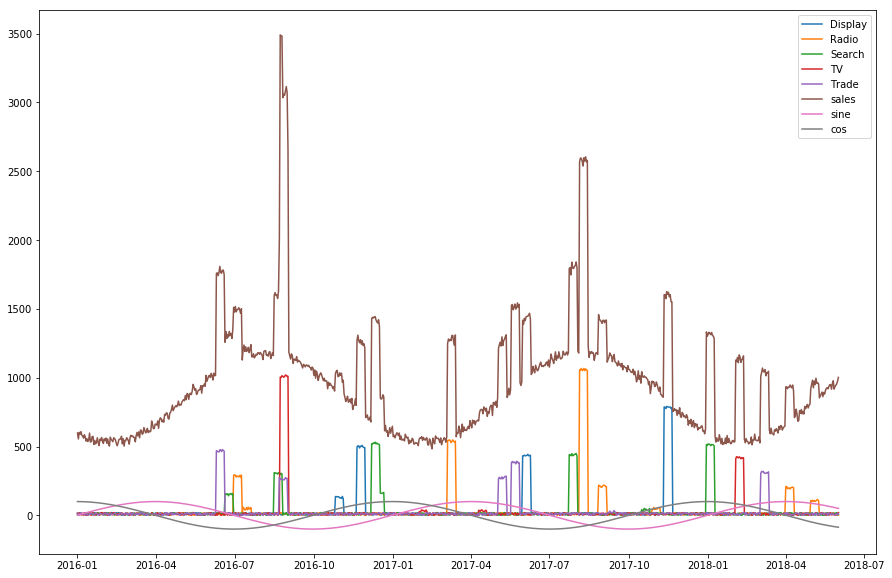

In [95]:
view_brand(data_viewed, 'Caffeinos')